In [97]:
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV,train_test_split , cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [98]:
df =  pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A14 Decision Trees\\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Dataset = Fraud_check 

Informarion:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [100]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [101]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [102]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [103]:
df.agg(["skew","kurt"])

,Taxable.Income,City.Population,Work.Experience
skew,0.030015,0.125009,0.018529
kurt,-1.199782,-1.120154,-1.167524


In [104]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Undergrad 
 YES    312
NO     288
Name: Undergrad, dtype: int64
Marital.Status 
 Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
Taxable.Income 
 59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64
City.Population 
 57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: City.Population, Length: 598, dtype: int64
Work.Experience 
 10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64
Urban 
 YES    302
NO     298
Name: Urban, dtype: int64


In [105]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

Undergrad 
 ['NO' 'YES']
Marital.Status 
 ['Single' 'Divorced' 'Married']
Taxable.Income 
 [68833 33700 36925 50190 81002 33329 83357 62774 83519 98152 29732 61063
 11794 61830 64070 69869 24987 39476 97957 10987 88636 14310 78969 92040
 38239 31417 55299 87778 10379 94033 73854 64007 97200 82071 12514 31336
 10163 68513 14912 74010 50777 49436 96485 70339 33614 81079 31532 44034
 16264 45706 79616 40137 97703 21917 81939 19925 34703 78573 10870 65065
 94418 26972 91684 51685 62158 58312 42507 61486 10150 99619 89302 94287
 41344 41382 32434 61105 67628 31458 73411 10329 44947 35610 66564 87348
 69098 28449 39277 13747 86652 26741 77634 99325 85651 15296 10348 41395
 22258 79583 22187 52495 93078 35072 32662 89250 41641 55873 19169 46629
 51927 69224 24557 77762 96355 90910 21945 79357 42784 54638 29944 97318
 52022 20391 21016 26679 70682 87326 15853 75501 97984 53378 93458 56501
 46955 33492 35832 12470 53981 22773 84691 50087 27877 56647 59419 26783
 79453 33962 84429 63057 43128 40

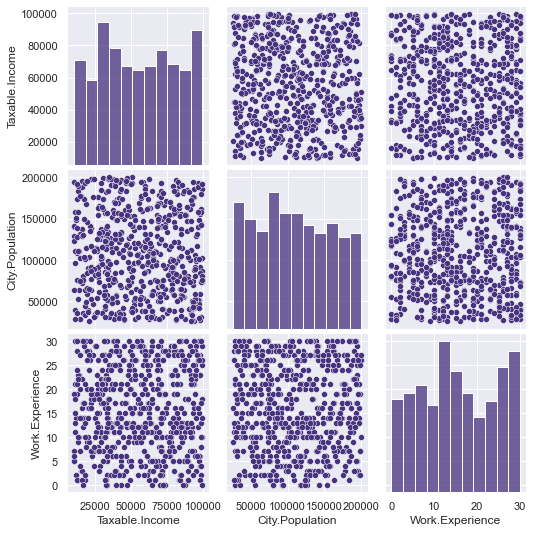

In [106]:
sns.pairplot(df)

In [107]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['Undergrad', 'Marital.Status', 'Urban']


There are 3 Numeric variables

The Numeric variables are :
 ['Taxable.Income', 'City.Population', 'Work.Experience']


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


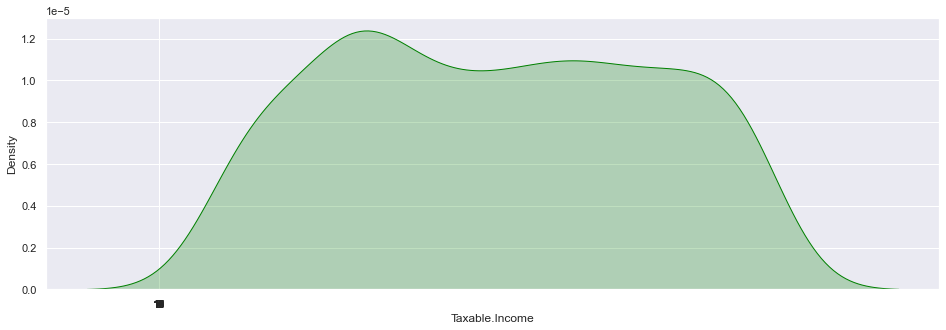

Skew: 0.12500898782679504
Kurtosis: -1.1201539229184019


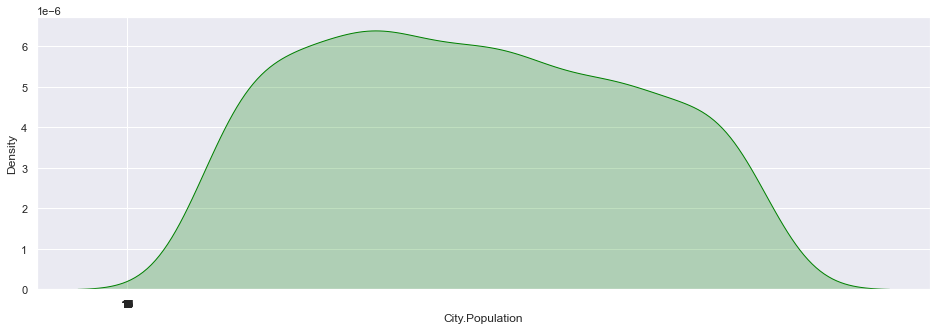

Skew: 0.01852862786533781
Kurtosis: -1.1675237113768457


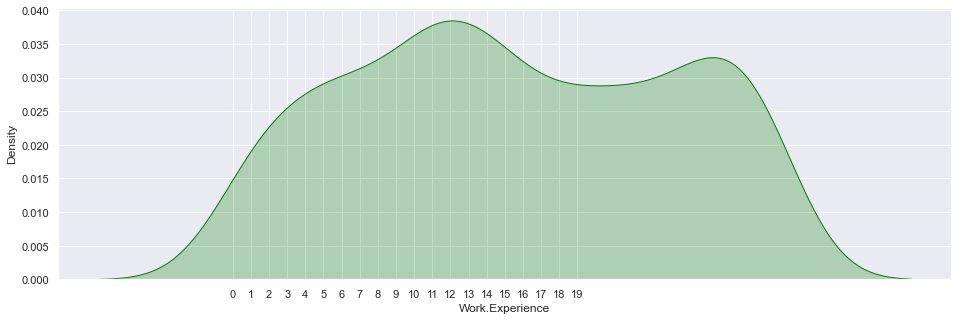

In [108]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()

<Figure size 432x288 with 0 Axes>

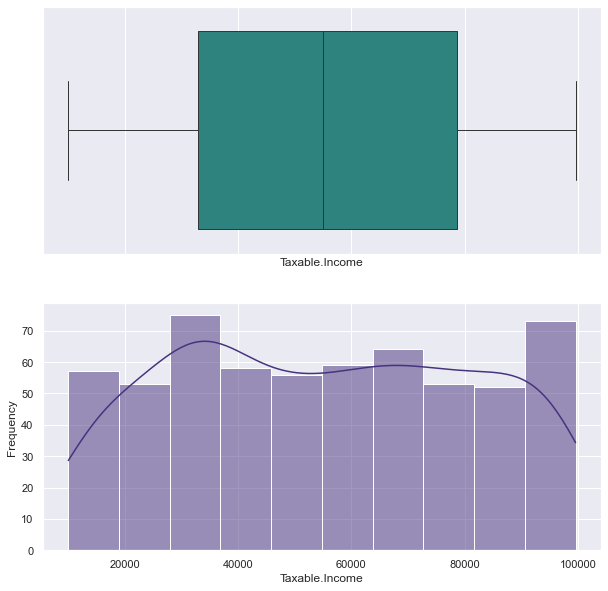

<Figure size 720x720 with 0 Axes>

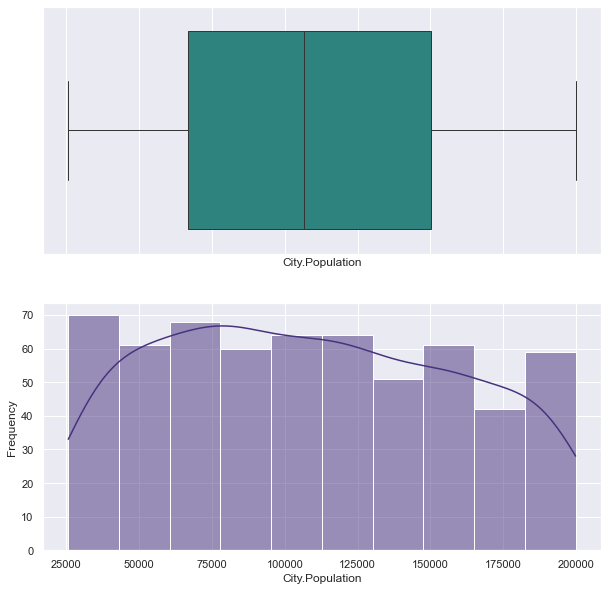

<Figure size 720x720 with 0 Axes>

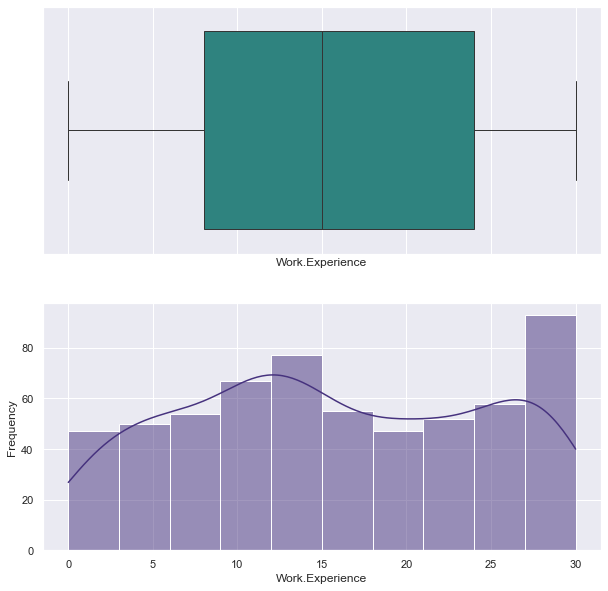

In [109]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

<AxesSubplot:>

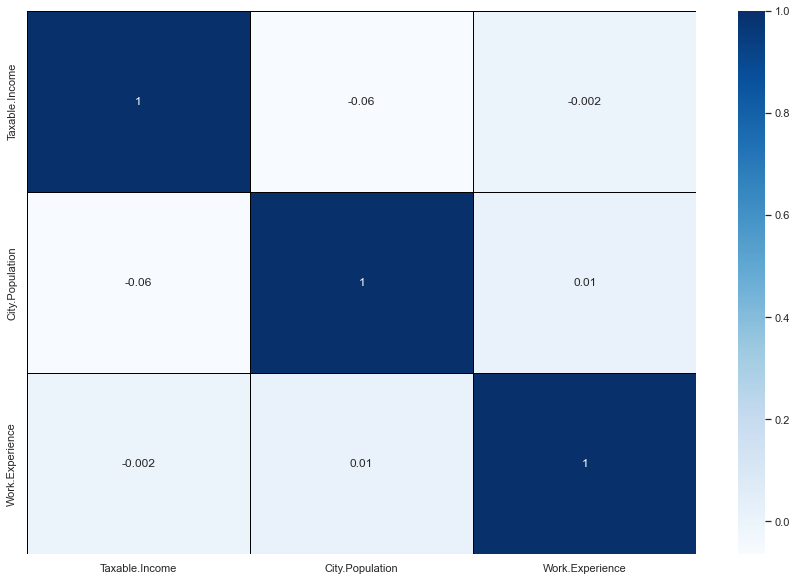

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')

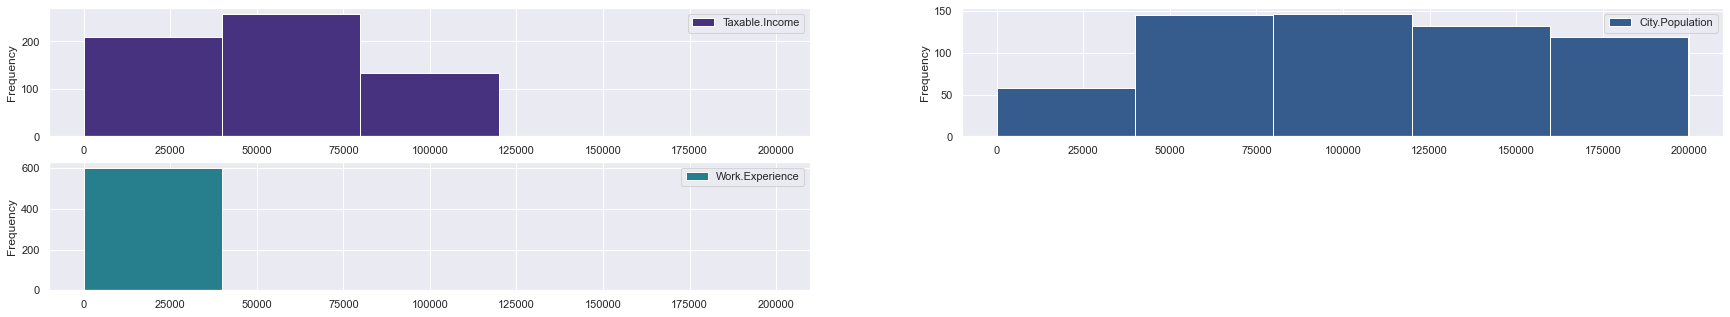

In [111]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(9,2), sharex=False, sharey=False)

plt.show()

## Data Prerocessing:

> Adding new column

In [112]:
# df["fraud"]= df["Taxable.Income"]
# df

### Coading dependent variavle 

In [113]:
df['Taxable.Income'] = np.where( df['Taxable.Income'] <= 30000, 1, 0)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [114]:
df['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [115]:
data=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


In [116]:
data.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [412]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.        , 0.13947207, 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.62239438, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.77256766, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.73723987, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.88680969, 0.56666667, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.76068253, 0.53333333, ..., 0.        , 1.        ,
        0.        ]])

In [413]:
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index)
scaled_data


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [432]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)

In [433]:
x=scaled_data.drop(['Taxable.Income'], axis=1)
y=scaled_data["Taxable.Income"]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income, Length: 600, dtype: float64

In [434]:
x, y = ros.fit_resample(x, y)
y_df = pd.DataFrame(y)
y_df

,Taxable.Income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
947,1.0
948,1.0
949,1.0
950,1.0


In [435]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [436]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 9)
(286, 9)
(666,)
(286,)


# **Building Decision Tree Classifier using Gini Criteria**

## Gini Index:

* Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
* It means an attribute with lower Gini index should be preferred.
* Sklearn supports “Gini” criteria for Gini Index and by default, it takes “gini” value.
* The Formula for the calculation of the Gini Index is given below.



> 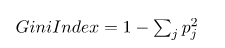

In [437]:
print(f'\n\n To find max depth \n\n')
for i in range(2,20):
  entro_model = DecisionTreeClassifier(criterion = 'gini',max_depth=i, random_state=42)
  entro_model.fit(x_train, y_train)
  a=entro_model.score(x_train, y_train)
  b=entro_model.score(x_test, y_test)
  print(f' number {i} : train {a} , test {b}')



 To find max depth 


 number 2 : train 0.5795795795795796 , test 0.5454545454545454
 number 3 : train 0.6006006006006006 , test 0.5664335664335665
 number 4 : train 0.6111111111111112 , test 0.5524475524475524
 number 5 : train 0.6606606606606606 , test 0.6048951048951049
 number 6 : train 0.6831831831831832 , test 0.6153846153846154
 number 7 : train 0.7192192192192193 , test 0.6258741258741258
 number 8 : train 0.7492492492492493 , test 0.6503496503496503
 number 9 : train 0.7807807807807807 , test 0.6888111888111889
 number 10 : train 0.8168168168168168 , test 0.7167832167832168
 number 11 : train 0.8393393393393394 , test 0.7237762237762237
 number 12 : train 0.8588588588588588 , test 0.7587412587412588
 number 13 : train 0.8903903903903904 , test 0.7902097902097902
 number 14 : train 0.9039039039039038 , test 0.7972027972027972
 number 15 : train 0.9264264264264265 , test 0.8146853146853147
 number 16 : train 0.9519519519519519 , test 0.8216783216783217
 number 17 : train 0.968

## Model Building :

In [501]:
from sklearn.tree import DecisionTreeClassifier
gini_model = DecisionTreeClassifier(criterion = 'gini', random_state =42, max_depth = 12)
gini_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

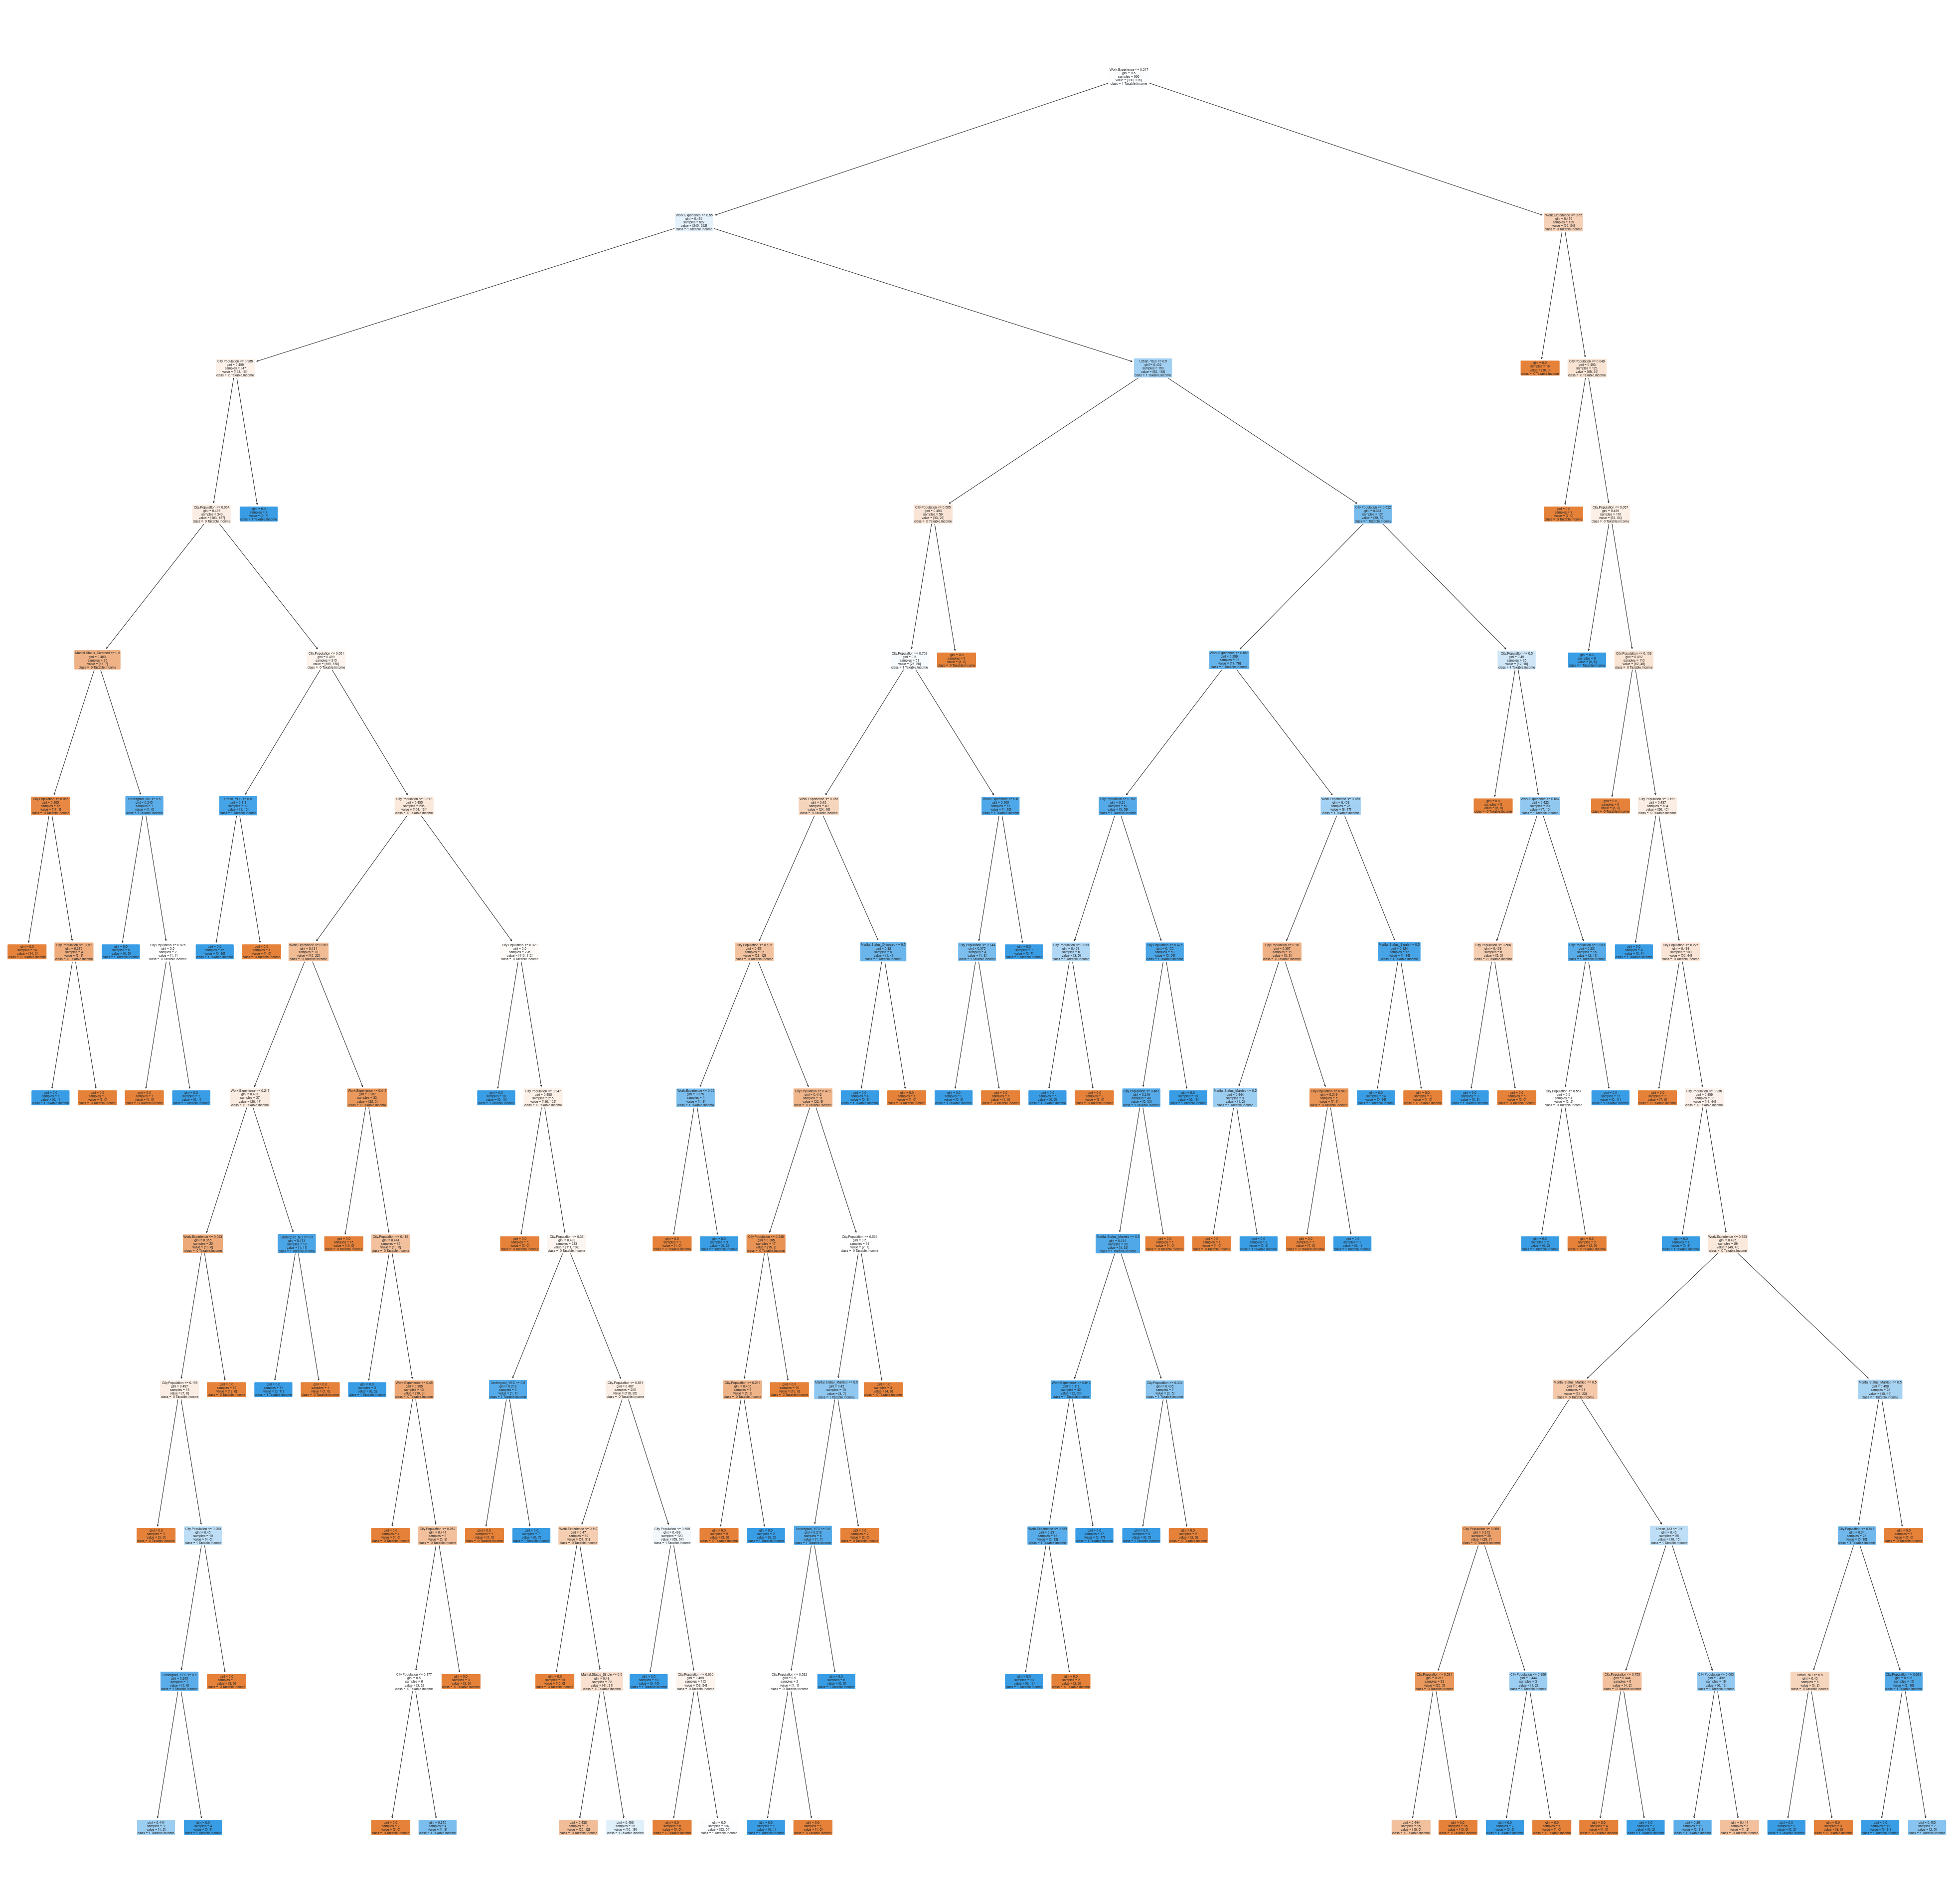

In [502]:
#PLot the decision tree
plt.figure(figsize = (70,70))
tree.plot_tree(gini_model, filled = True , rounded = True , class_names = [" 0 Taxable.Income" , "1 Taxable.Income"] , feature_names = x.columns);

In [490]:
y_train.value_counts()

1.0    336
0.0    330
Name: Taxable.Income, dtype: int64

In [503]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gini_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gini_model.score(x_test, y_test)))

Training set score: 0.8589
Test set score: 0.7587


In [504]:
#Predicting on test data
gini_preds = gini_model.predict(x_test) # predicting on test data set 
pd.Series(gini_preds).value_counts() # getting the count of each category 

1.0    177
0.0    109
dtype: int64

In [505]:
df1 = pd.DataFrame({'actual': y_test, 'Gini_Prediction': gini_preds})
df1.head()

,actual,Gini_Prediction
199,1.0,1.0
420,0.0,0.0
694,1.0,1.0
750,1.0,1.0
507,0.0,0.0


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

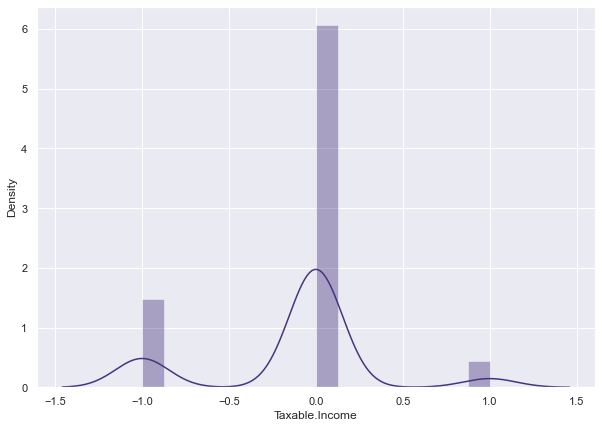

In [506]:
# checking difference between labled y and predicted y

plt.figure(figsize= (10,7))
sns.distplot(y_test-gini_preds)

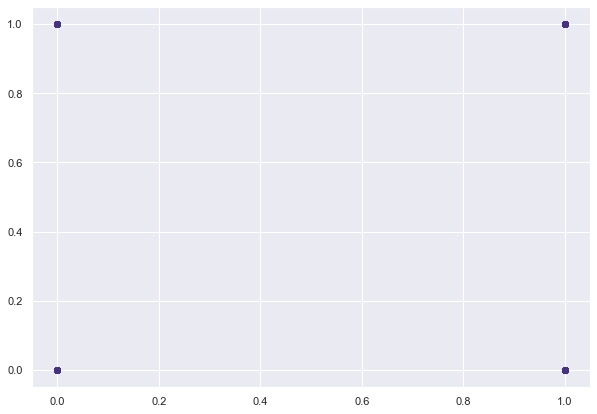

In [507]:

plt.figure(figsize= (10,7))
plt.scatter(y_test,gini_preds)

In [508]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,gini_preds)*100)

Accuracy_score 75.87412587412588


In [510]:
cm=pd.crosstab(y_test, gini_preds, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,0.0,1.0
Actual,,
0.0,93,53
1.0,16,124


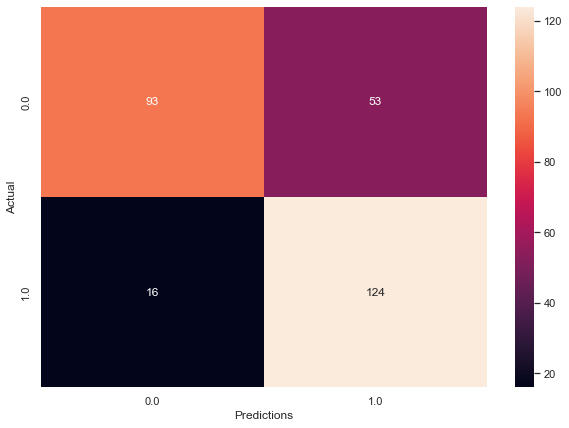

In [511]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [512]:
print(classification_report(y_test, gini_preds))

              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73       146
         1.0       0.70      0.89      0.78       140

    accuracy                           0.76       286
   macro avg       0.78      0.76      0.76       286
weighted avg       0.78      0.76      0.76       286



In [513]:
# RMSE for train data
train_preds_grid = gini_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = gini_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.3756875578737485 

 test rmse = 0.49118096589621757 




In [514]:
y_test.value_counts()

0.0    146
1.0    140
Name: Taxable.Income, dtype: int64

In [515]:
gini_preds

array([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1.

In [516]:
#Probability:

y_pred_prob = gini_model.predict_proba(x_test)
y_pred_prob[10]

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.495327,0.504673
1,1.000000,0.000000
2,0.333333,0.666667
3,0.000000,1.000000
4,1.000000,0.000000
...,...,...
281,0.495327,0.504673
282,0.495327,0.504673
283,0.000000,1.000000
284,1.000000,0.000000


In [517]:
y_pred_prob_df.value_counts()

0         1       
0.000000  1.000000    92
1.000000  0.000000    76
0.495327  0.504673    51
0.675676  0.324324    19
0.457143  0.542857    15
0.666667  0.333333    14
0.153846  0.846154     8
0.250000  0.750000     4
0.285714  0.714286     4
0.333333  0.666667     3
dtype: int64



 ROC AUC score: 0.7613502935420744 




Text(0, 0.5, 'True Positive Rate')

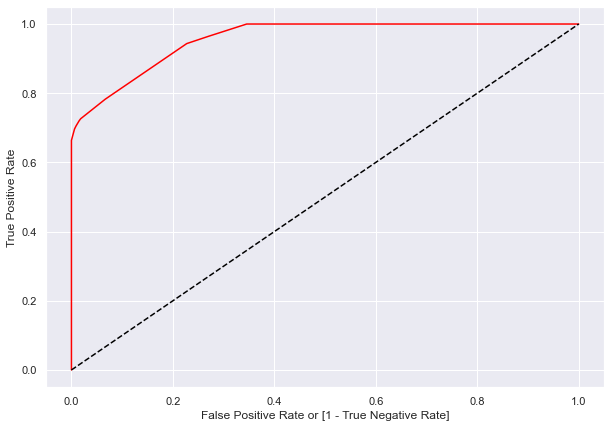

In [519]:
fpr, tpr, thresholds = roc_curve(y_train, gini_model.predict_proba (x_train)[:,1])

# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, gini_preds)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

# **Building Decision Tree Classifier using Entropy Criteria**

>The maximum value for entropy is 1 whereas the maximum value for Gini impurity is 0.5.

if you want to make an unbiased coin toss, there is complete randomness or an Entropy value of 1 (“heads” and “tails” are equally like, with a probability of 0.5 each). On the other hand, if you make a coin toss, with for example a coin that has “tails” on both sides, randomness is removed from the event and the Entropy value is 0 (probability of getting “tails” will jump to 1, and probability of “heads” will drop to 0).

>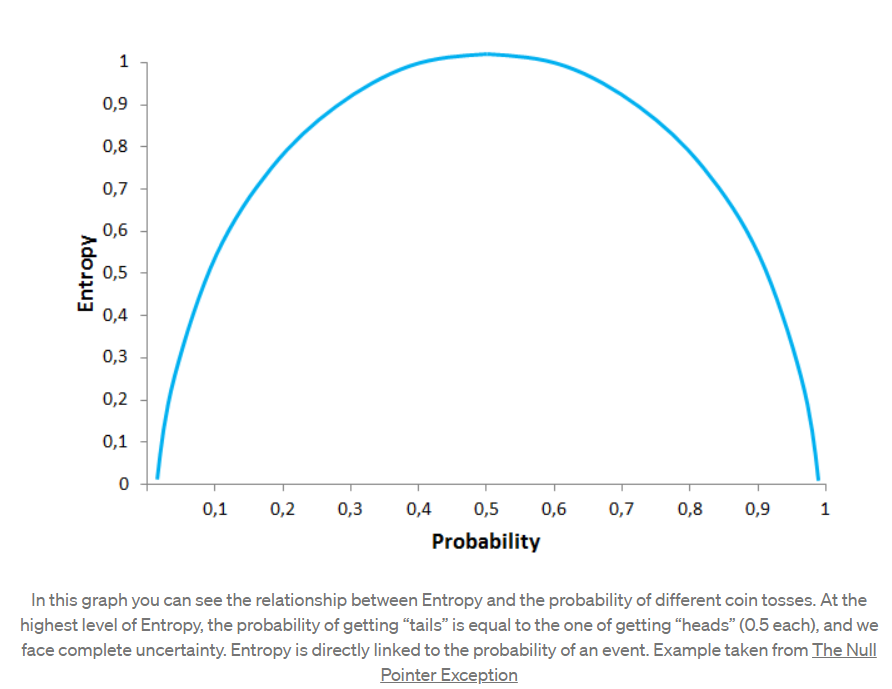



* 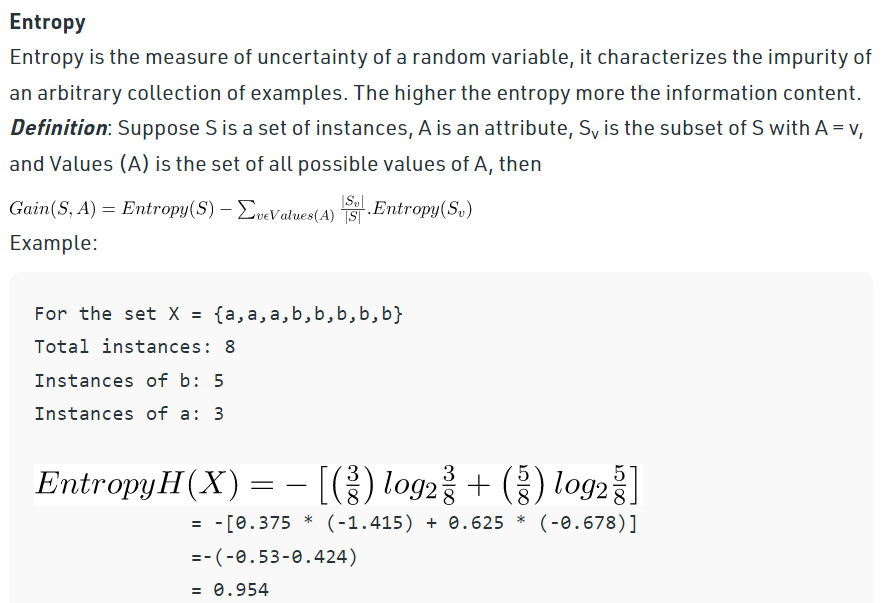

>This is important because Information Gain is the decrease in Entropy, and the attribute that yields the largest Information Gain is chosen for the DT node.

In [520]:
print(f'\n\n To find max depth \n\n')
for i in range(2,20):
  entro_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=i, random_state=42)
  entro_model.fit(x_train, y_train)
  a=entro_model.score(x_train, y_train)
  b=entro_model.score(x_test, y_test)
  print(f' number {i} : train {a} , test {b}')



 To find max depth 


 number 2 : train 0.5795795795795796 , test 0.5454545454545454
 number 3 : train 0.6006006006006006 , test 0.5664335664335665
 number 4 : train 0.6111111111111112 , test 0.5524475524475524
 number 5 : train 0.6351351351351351 , test 0.583916083916084
 number 6 : train 0.6531531531531531 , test 0.583916083916084
 number 7 : train 0.6711711711711712 , test 0.5629370629370629
 number 8 : train 0.6966966966966966 , test 0.6363636363636364
 number 9 : train 0.7612612612612613 , test 0.6398601398601399
 number 10 : train 0.8078078078078078 , test 0.7167832167832168
 number 11 : train 0.8333333333333334 , test 0.6818181818181818
 number 12 : train 0.8648648648648649 , test 0.7272727272727273
 number 13 : train 0.9069069069069069 , test 0.7447552447552448
 number 14 : train 0.9234234234234234 , test 0.7587412587412588
 number 15 : train 0.93993993993994 , test 0.7867132867132867
 number 16 : train 0.9519519519519519 , test 0.7972027972027972
 number 17 : train 0.9609609

In [531]:
from sklearn.tree import DecisionTreeClassifier
entro_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 12)
entro_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

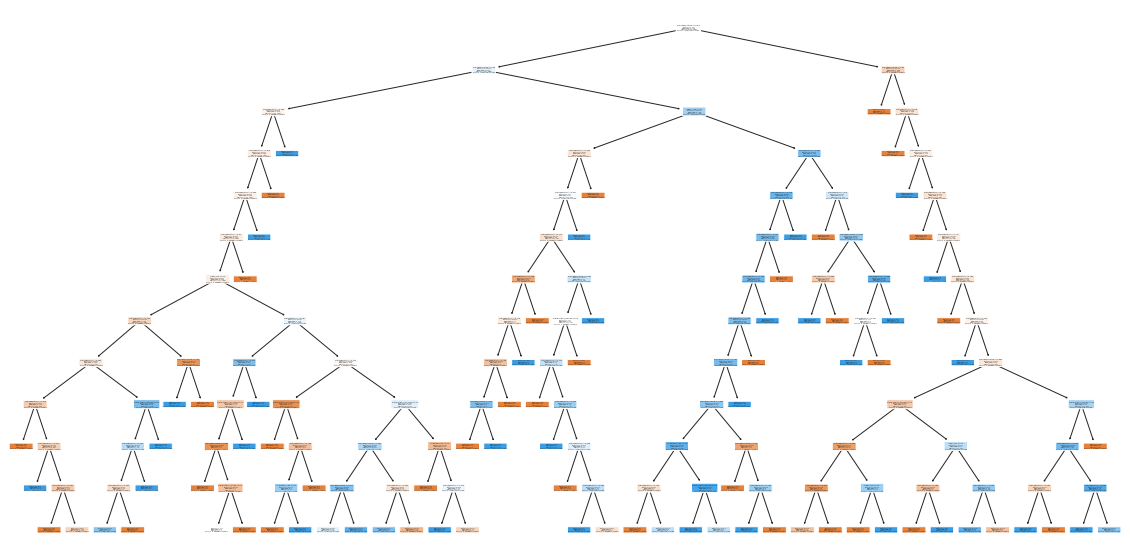

In [532]:
#PLot the decision tree
plt.figure(figsize = (20,10))
tree.plot_tree(entro_model, filled = True , rounded = True , class_names = [" 0 Taxable.Income" , "1 Taxable.Income"] , feature_names = x.columns);

In [534]:
y_train.value_counts()

1.0    336
0.0    330
Name: Taxable.Income, dtype: int64

In [535]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(entro_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(entro_model.score(x_test, y_test)))

Training set score: 0.8649
Test set score: 0.7273


In [536]:
#Predicting on test data
entro_preds = entro_model.predict(x_test) # predicting on test data set 
pd.Series(entro_preds).value_counts() # getting the count of each category 

1.0    150
0.0    136
dtype: int64

In [537]:
df1 = pd.DataFrame({'actual': y_test, 'Entro_Prediction': entro_preds})
df1.head()

,actual,Entro_Prediction
199,1.0,1.0
420,0.0,1.0
694,1.0,0.0
750,1.0,0.0
507,0.0,1.0


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

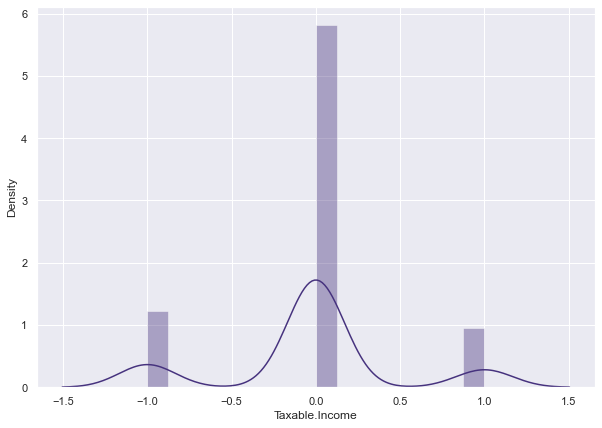

In [538]:
# checking difference between labled y and predicted y

plt.figure(figsize= (10,7))
sns.distplot(y_test-entro_preds)

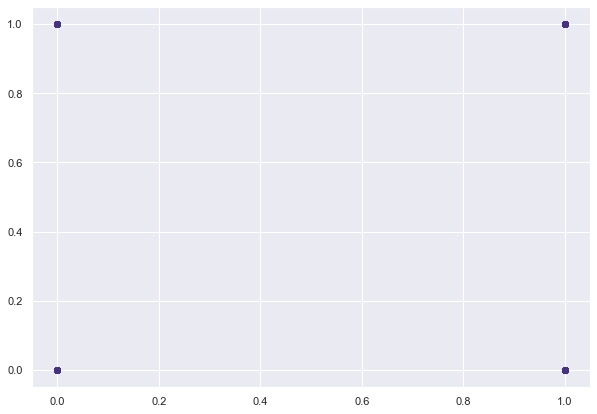

In [539]:

plt.figure(figsize= (10,7))
plt.scatter(y_test,entro_preds)

In [540]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,entro_preds)*100)

Accuracy_score 72.72727272727273


In [542]:
cm=pd.crosstab(y_test, entro_preds, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,0.0,1.0
Actual,,
0.0,102,44
1.0,34,106


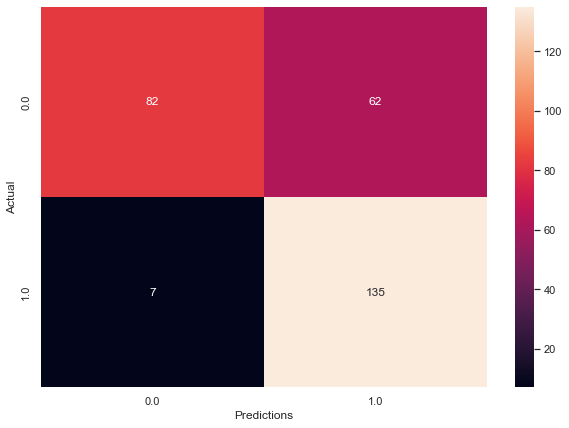

In [298]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [543]:
print(classification_report(y_test, entro_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       146
         1.0       0.71      0.76      0.73       140

    accuracy                           0.73       286
   macro avg       0.73      0.73      0.73       286
weighted avg       0.73      0.73      0.73       286



In [544]:
# RMSE for train data
train_preds_grid = entro_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = entro_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.36760731104690386 

 test rmse = 0.5222329678670935 




In [545]:
y_test.value_counts()

0.0    146
1.0    140
Name: Taxable.Income, dtype: int64

In [547]:
entro_preds

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [548]:
#Probability:

y_pred_prob = entro_model.predict_proba(x_test)
y_pred_prob[10]

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.000000,1.000000
1,0.000000,1.000000
2,0.601942,0.398058
3,0.571429,0.428571
4,0.000000,1.000000
...,...,...
281,0.458333,0.541667
282,0.000000,1.000000
283,0.000000,1.000000
284,1.000000,0.000000


In [549]:
y_pred_prob_df.value_counts()

0         1       
0.000000  1.000000    93
1.000000  0.000000    62
0.601942  0.398058    42
0.129032  0.870968    16
0.666667  0.333333    14
0.458333  0.541667    13
0.285714  0.714286    11
0.705882  0.294118     9
0.153846  0.846154     8
0.600000  0.400000     6
0.400000  0.600000     5
0.250000  0.750000     4
0.571429  0.428571     3
dtype: int64



 ROC AUC score: 0.7278864970645793 




Text(0, 0.5, 'True Positive Rate')

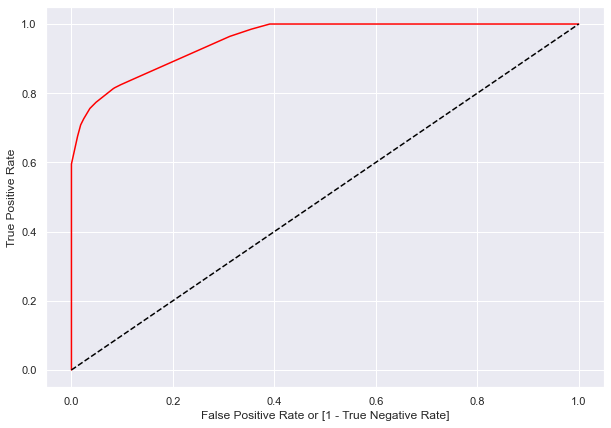

In [554]:
fpr, tpr, thresholds = roc_curve(y_train, entro_model.predict_proba (x_train)[:,1])

# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, entro_preds)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

## ID3 :

* ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step.

* ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node.

* Most generally ID3 is only used for classification problems with nominal features only.

* ID3 uses Information Gain or just Gain to find the best feature.

* Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one.

* But ID3 has some disadvantages: it can’t handle numeric attributes nor missing values, which can represent serious limitations.

## CHAID :

* The Chi-squared Automatic Interaction Detection (CHAID) is one of the oldest DT algorithms methods that produces multiway DTs (splits can have more than two branches) suitable for classification and regression tasks. When building Classification Trees (where the dependent variable is categorical in nature), CHAID relies on the Chi-square independence tests to determine the best split at each step. Chi-square tests check if there is a relationship between two variables, and are applied at each stage of the DT to ensure that each branch is significantly associated with a statistically significant predictor of the response variable.
                   In other words, it chooses the independent variable that has the strongest interaction with the dependent variable.
                   
* Additionally, categories of each predictor are merged if they are not significantly different between each other, with respect to the dependent variable. In the case of Regression Trees (where the dependent variable is continuous), CHAID relies on F-tests (instead of Chi-square tests) to calculate the difference between two population means. If the F-test is significant, a new partition (child node) is created (which means that the partition is statistically different from the parent node). On the other hand, if the result of the F-test between target means is not significant, the categories are merged into a single node.

* CHAID does not replace missing values and handles them as a single class which may merge with another class if appropriate. It also produces DTs that tend to be wider rather than deeper (multiway characteristic), which may be unrealistically short and hard to relate to real business conditions. Additionally, it has no pruning function.

* Although not the most powerful (in terms of detecting the smallest possible differences) or fastest DT algorithm out there, CHAID is easy to manage, flexible and can be very useful

## CART:

* CART is a DT algorithm that produces binary Classification or Regression Trees, depending on whether the dependent (or target) variable is categorical or numeric, respectively. It handles data in its raw form (no preprocessing needed), and can use the same variables more than once in different parts of the same DT, which may uncover complex interdependencies between sets of variables.

* In the case of Classification Trees, CART algorithm uses a metric called Gini Impurity to create decision points for classification tasks. Gini Impurity gives an idea of how fine a split is (a measure of a node’s “purity”), by how mixed the classes are in the two groups created by the split. When all observations belong to the same label, there’s a perfect classification and a Gini Impurity value of 0 (minimum value). On the other hand, when all observations are equally distributed among different labels, we face the worst case split result and a Gini Impurity value of 1 (maximum value).

>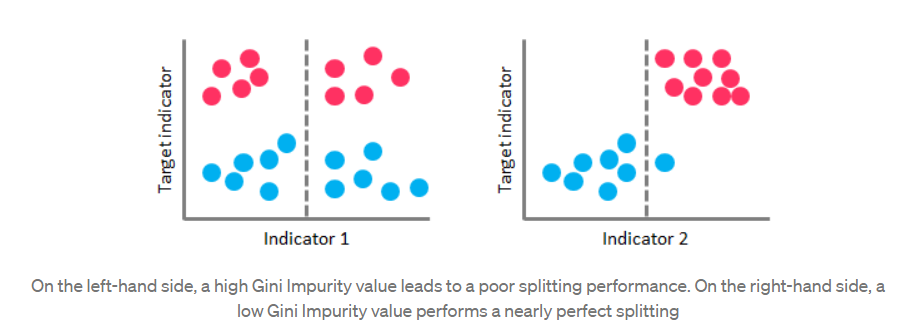

* In the case of Regression Trees, CART algorithm looks for splits that minimize the Least Square Deviation (LSD), choosing the partitions that minimize the result over all possible options. The LSD (sometimes referred as “variance reduction”) metric minimizes the sum of the squared distances (or deviations) between the observed values and the predicted values. The difference between the predicted and observed values is called “residual”, which means that LSD chooses the parameter estimates so that the sum of the squared residuals is minimized.

* LSD is well suited for metric data and has the ability to correctly capture more information about the quality of the split than other algorithms.

* The idea behind CART algorithm is to produce a sequence of DTs, each of which is a candidate to be the “optimal Tree”. This optimal Tree is identified by evaluating the performance of every Tree through testing (using new data, which the DT has never seen before) or performing cross-validation (dividing the dataset into “k” number of folds, and perform testings on each fold).

* CART doesn’t use an internal performance measure for Tree selection. Instead, DTs performances are always measured through testing or via cross-validation, and the Tree selection proceeds only after this evaluation has been done.

## C4.5:

* C4.5 is the successor of ID3 and represents an improvement in several aspects. C4.5 can handle both continuous and categorical data, making it suitable to generate Regression and Classification Trees. Additionally, it can deal with missing values by ignoring instances that include non-existing data.

* Unlike ID3 (which uses Information Gain as splitting criteria), C4.5 uses Gain Ratio for its splitting process. Gain Ratio is a modification of the Information Gain concept that reduces the bias on DTs with huge amount of branches, by taking into account the number and size of the branches when choosing an attribute. Since Information Gain shows an unfair favoritism towards attributes with many outcomes, Gain Ratio corrects this trend by considering the intrinsic information of each split (it basically “normalizes” the Information Gain by using a split information value). This way, the attribute with the maximum Gain Ratio is selected as the splitting attribute.

* Additionally, C4.5 includes a technique called windowing, which was originally developed to overcome the memory limitations of earlier computers. Windowing means that the algorithm randomly selects a subset of the training data (called a “window”) and builds a DT from that selection. This DT is then used to classify the remaining training data, and if it performs a correct classification, the DT is finished. Otherwise, all the misclassified data points are added to the windows, and the cycle repeats until every instance in the training set is correctly classified by the current DT. This technique generally results in DTs that are more accurate than those produced by the standard process due to the use of randomization, since it captures all the “rare” instances together with sufficient “ordinary” cases.

* Another capability of C4.5 is that it can prune DTs.

* C4.5’s pruning method is based on estimating the error rate of every internal node, and replacing it with a leaf node if the estimated error of the leaf is lower. In simple terms, if the algorithm estimates that the DT will be more accurate if the “children” of a node are deleted and that node is made a leaf node, then C4.5 will delete those children.

* The latest version of this algorithm is called C5.0, which was released under proprietary license and presents some improvements over C4.5 like:

* Improved speed: C5.0 is significantly faster than C4.5 (by several orders of magnitude).
* Memory usage: C5.0 is more memory efficient than C4.5.
* Variable misclassification costs: in C4.5 all errors are treated as equal, but in practical applications some classification errors are more serious than others. C5.0 allows to define separate cost for each predicted/actual class pair.
* Smaller decision trees: C5.0 gets similar results to C4.5 with considerably smaller DTs.
* Additional data types: C5.0 can work with dates, times, and allows values to be noted as “not applicable”.
* Winnowing: C5.0 can automatically winnow the attributes before a classifier is constructed, discarding those that may be unhelpful or seem irrelevant.





## Using GridsearchCv For model Tunning:

In [584]:
# Modelling

clf = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random'],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [2,5,10],
    'max_leaf_nodes' : [None,2,5,10,100],
    'max_depth' : range(2, 11),
    #[10,8,6,3],
    'random_state': [42],
}

grid = GridSearchCV(clf, parameters, 
                   n_jobs=-1,
                   verbose=1, scoring="accuracy")

In [585]:
# Fit the model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'max_leaf_nodes': [None, 2, 5, 10, 100],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [586]:
# Check grid search score
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.702771855010661 
 
 {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 42, 'splitter': 'random'}


In [587]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 0.8604
Test set score: 0.7028


In [588]:
# Predict test values
y_pred = grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy : ", acc)

Accuracy :  0.7027972027972028


## Cost Complexity Pruning(Improve model accuracy with Alpha Value):

>In general pruning is a process of removal of selected part of plant such as bud,branches and roots . In Decision Tree pruning does the same task it removes the branchesof decision tree or a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree to overcome the overfitting condition of decision tree.

* cost-complexity of tree pruning?

>When we do cost-complexity pruning, we find the pruned tree that minimizes the cost-complexity. The cost is the measure of the impurity of the tree’s active leaf nodes, e.g. a weighted sum of the entropy of the samples in the active leaf nodes with weight given by the number of samples in each leaf.

* Post Pruning :

>This technique is used after construction of decision tree.

>This technique is used when decision tree will have very large depth and will show overfitting of model.

>It is also known as backward pruning.

>This technique is used when we have infinitely grown decision tree.

>Here we will control the branches of decision tree that is max_depth and min_samples_split using cost_complexity_pruning

In [589]:
model_gini = DecisionTreeClassifier(criterion = 'entropy', random_state= 42,max_depth= 10)
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00426442, 0.00426676, 0.00487254, 0.00508093,
       0.00513853, 0.00528056, 0.00532864, 0.00577269, 0.00600601,
       0.00672431, 0.00675322, 0.00803646, 0.00866224, 0.00889735,
       0.00892853, 0.00908971, 0.00949445, 0.00973421, 0.01066479,
       0.01073859, 0.01125491, 0.01153871, 0.01632953])

In [590]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_gini = DecisionTreeClassifier(criterion = 'entropy', random_state= 42, ccp_alpha=ccp_alpha,max_depth= 10)
    clf_gini.fit(x_train, y_train)
    clfs.append(clf_gini)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.01632952639453039


<Figure size 720x504 with 0 Axes>

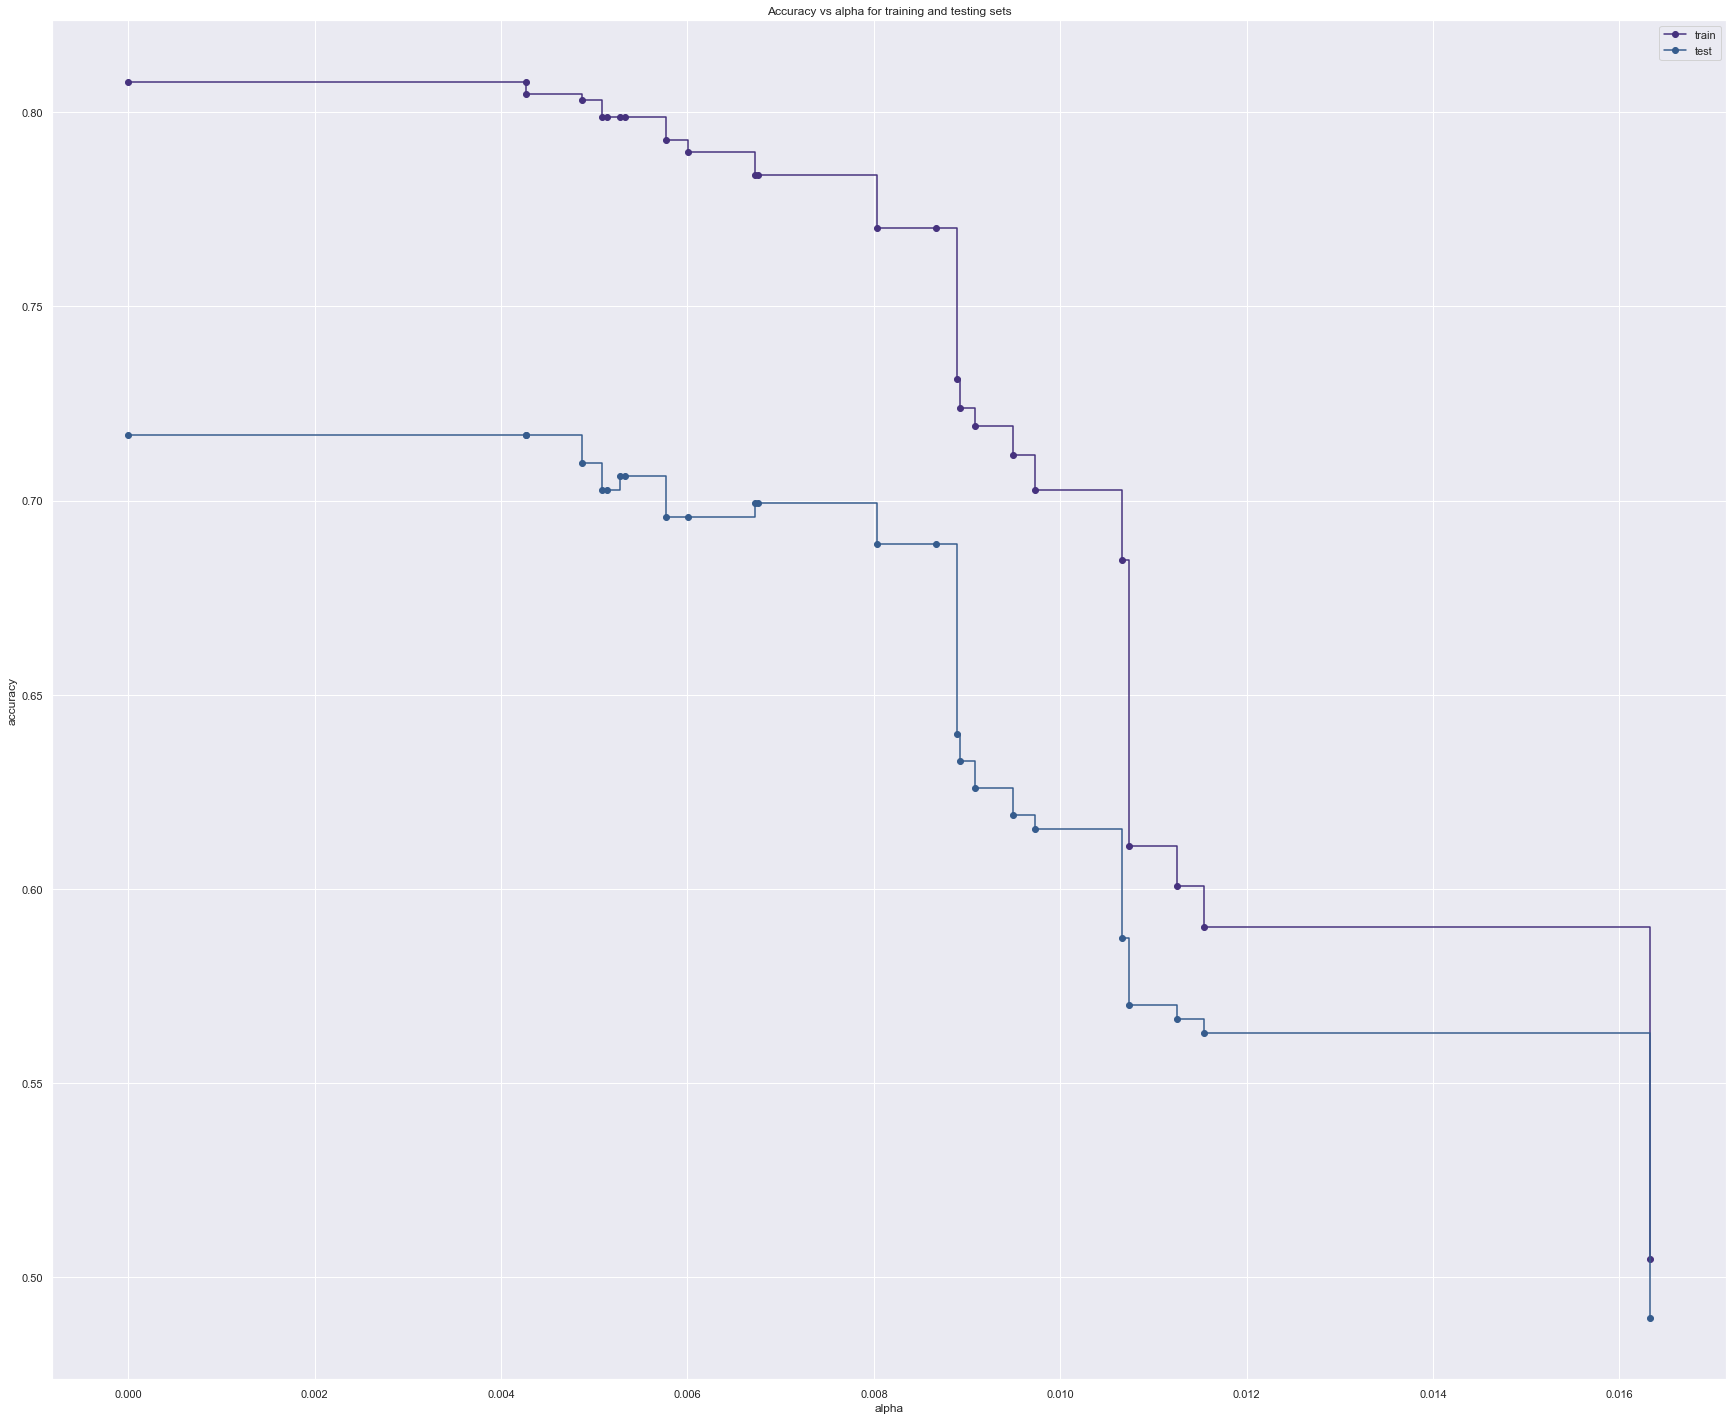

In [593]:
train_scores = [clf_gini.score(x_train, y_train) for clf_gini in clfs]
test_scores = [clf_gini.score(x_test, y_test) for clf_gini in clfs]
plt.figure(figsize= (10,7))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

>From the above plot, we can see that between alpha=0.015, we get the maximum test accuracy. Although our train accuracy and test accuracy has decreased there after, our model is now more generalized and it will perform better on unseen data.

<AxesSubplot:xlabel='tree'>

<Figure size 720x504 with 0 Axes>

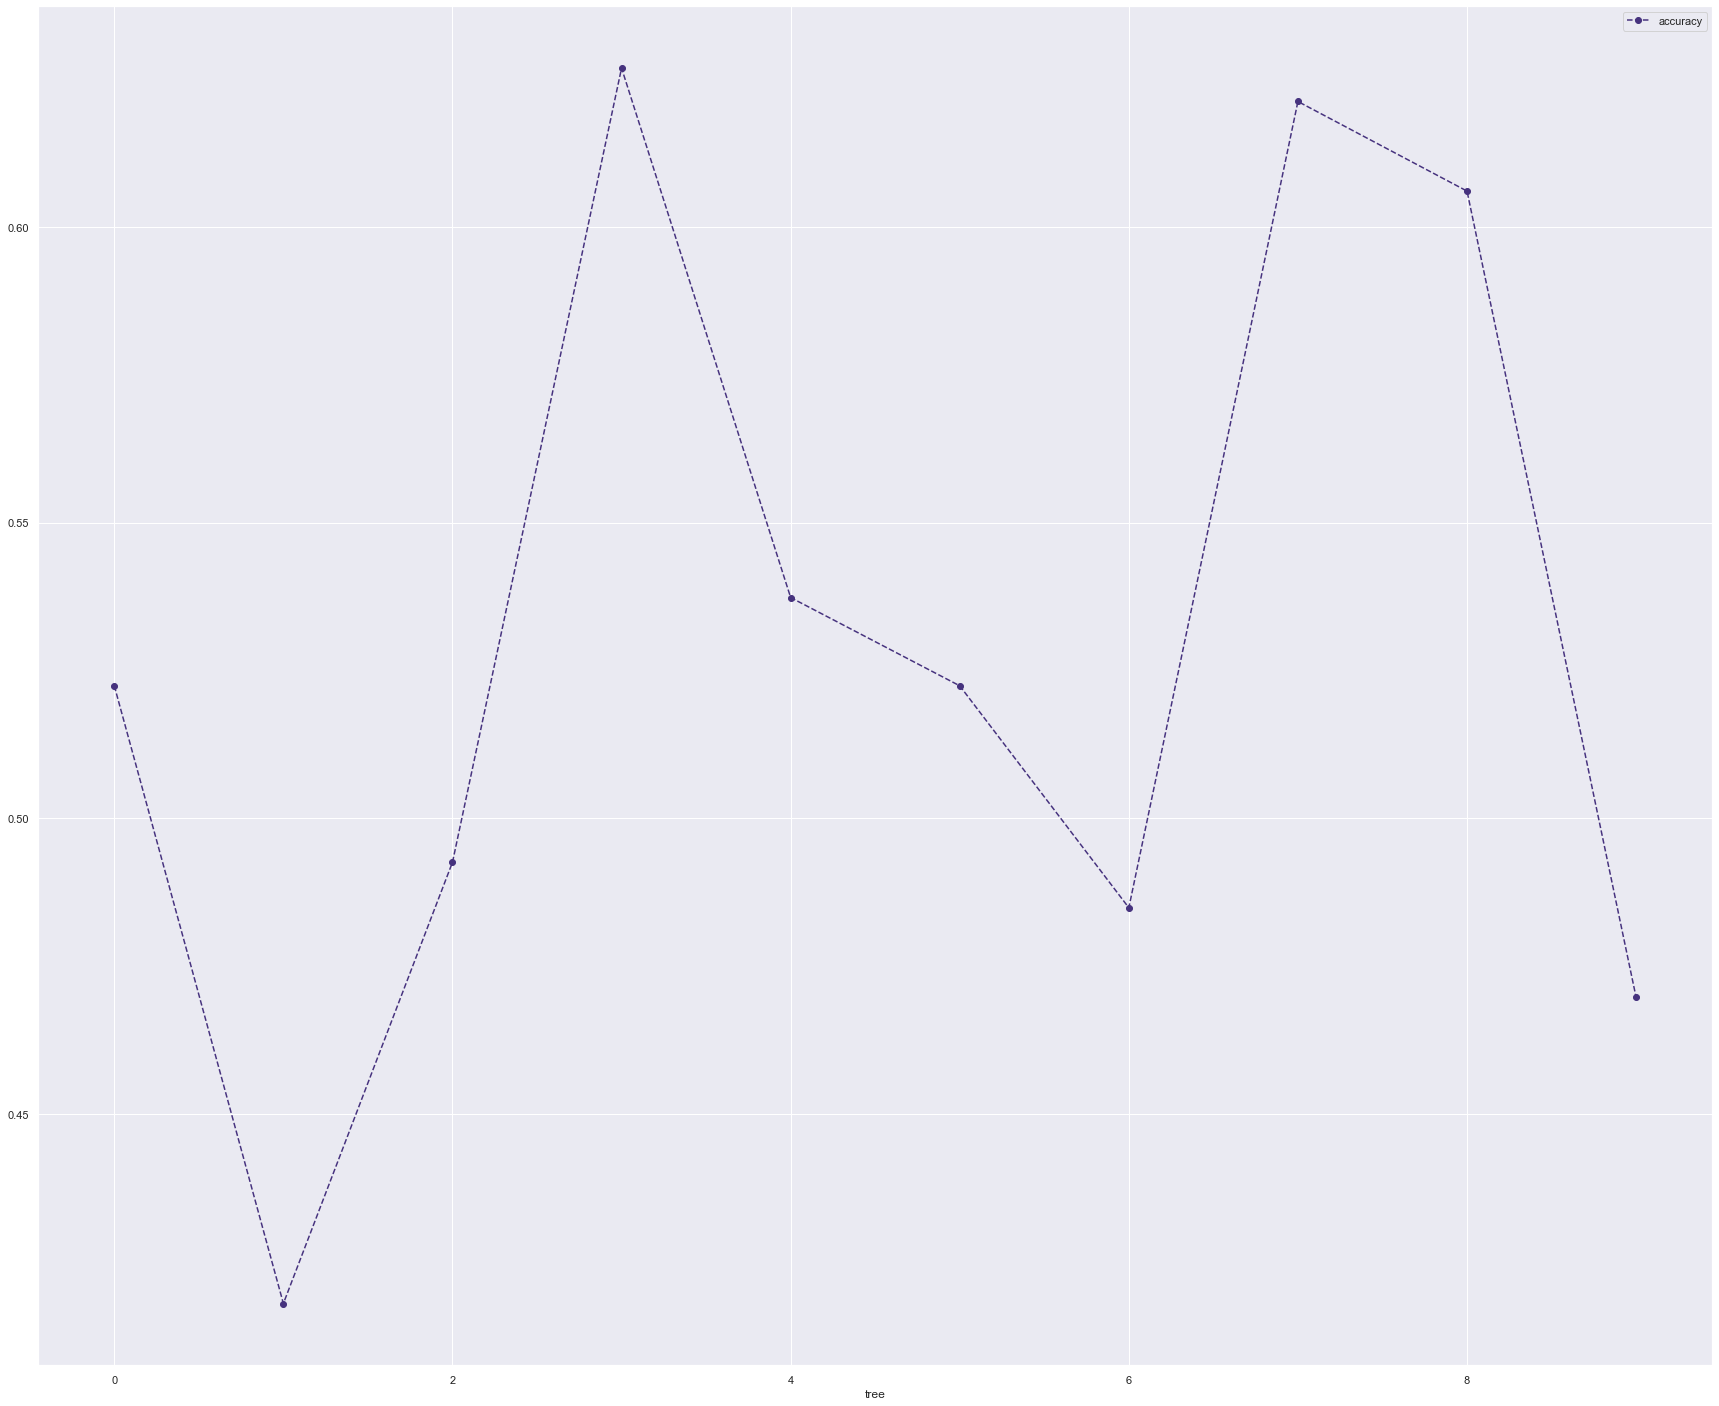

In [604]:
from sklearn.model_selection import cross_val_score

model =  DecisionTreeClassifier(random_state=42,criterion = 'entropy', ccp_alpha=0.015,max_depth= 10)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cv)

plt.figure(figsize= (10,7))

df=pd.DataFrame(data={'tree':range(10),'accuracy': scores})
df.plot(x='tree',y='accuracy', marker='o',linestyle='--')

<AxesSubplot:xlabel='alpha'>

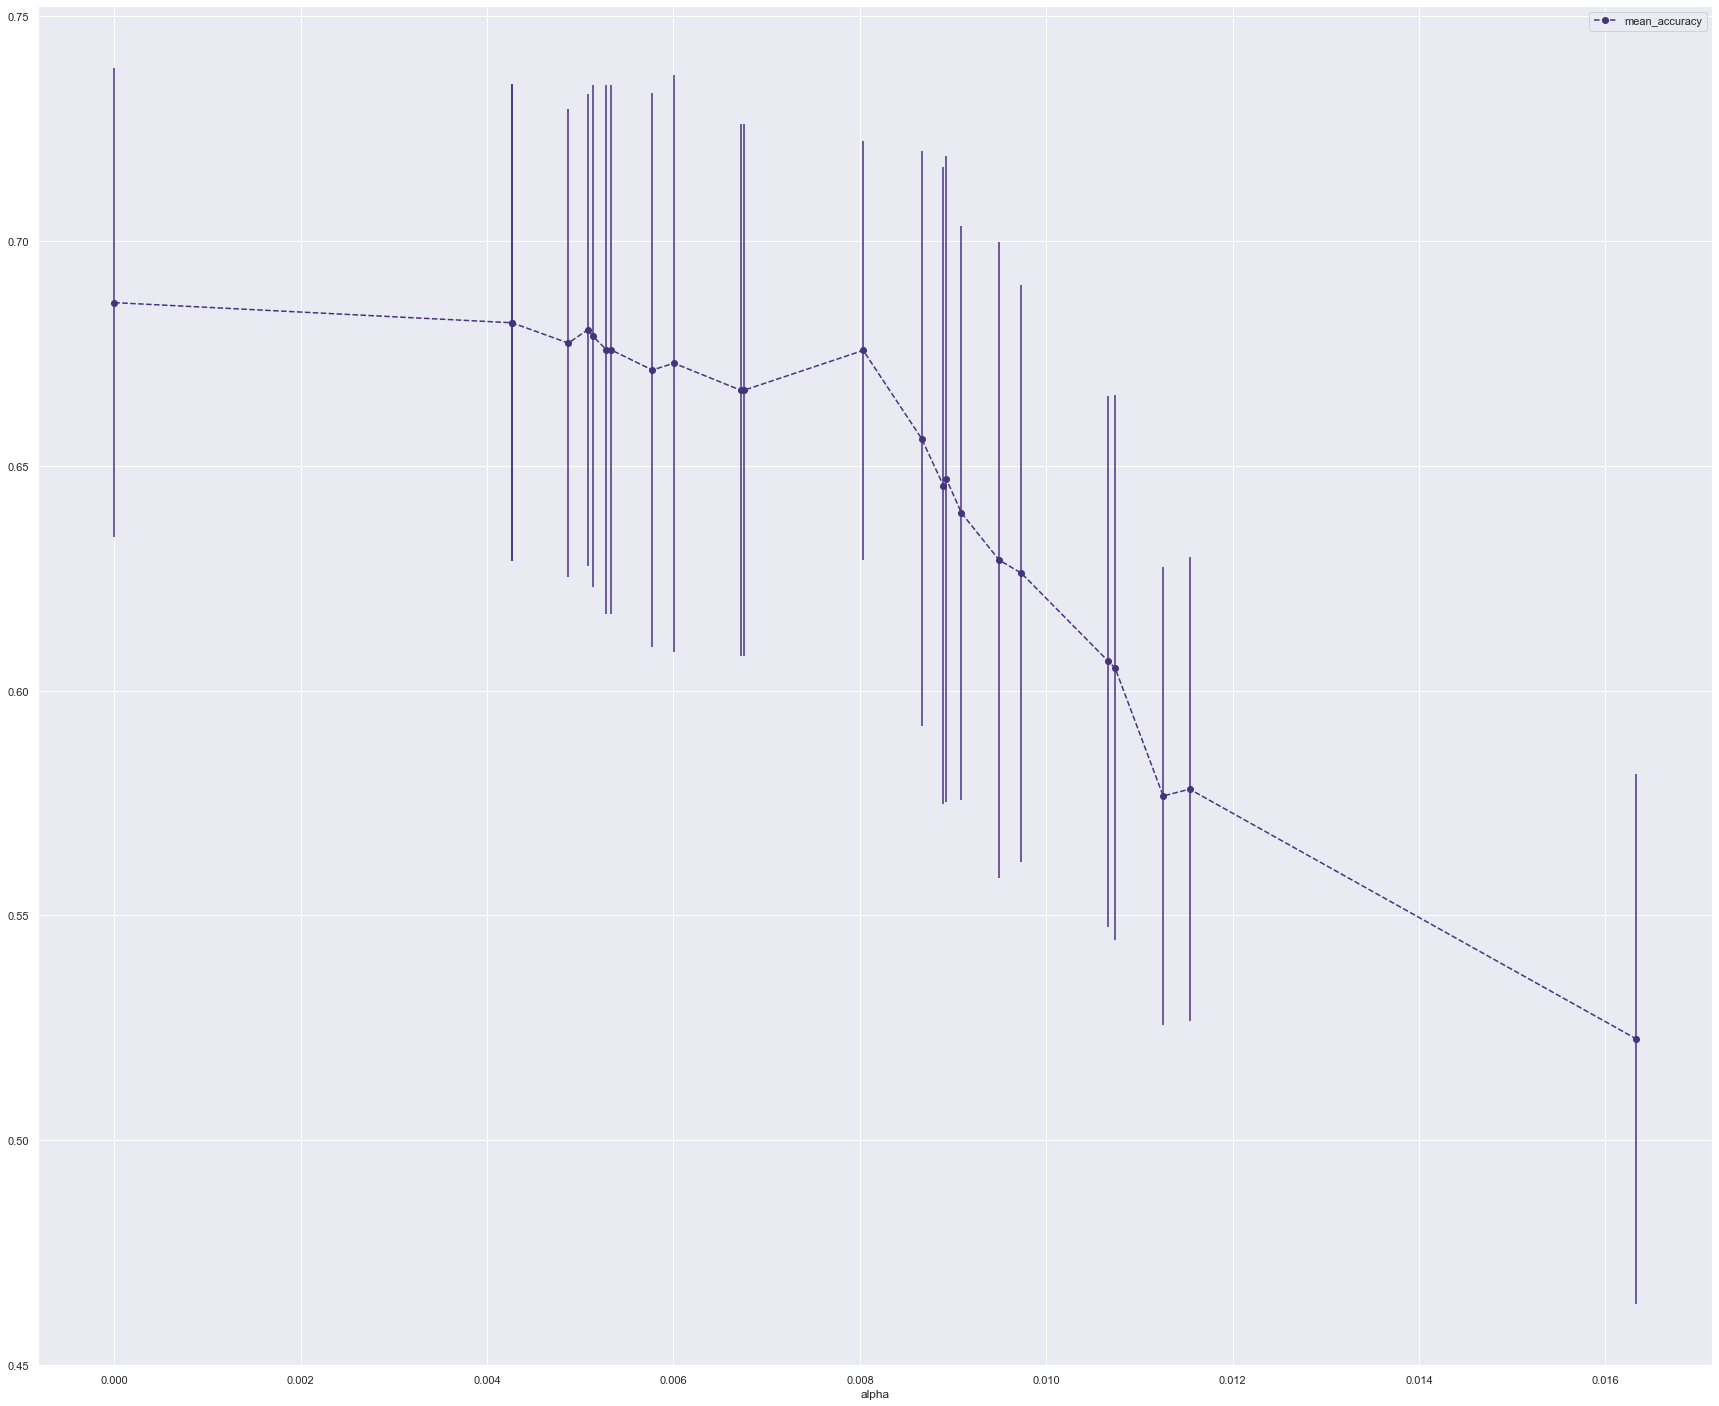

In [606]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  model=DecisionTreeClassifier(criterion = 'entropy', 
                               random_state = 42,
                               ccp_alpha=ccp_alpha,max_depth= 10)
  cv = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(model, x_train, y_train, cv=cv)
  alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [607]:
alpha_results=alpha_results[(alpha_results['alpha']>0.000)
              &
              (alpha_results['alpha']<0.016)].sort_values(by=['mean_accuracy'], ascending=False).iloc[0:1,:]
alpha_results

,alpha,mean_accuracy,std
1,0.004264,0.681841,0.053046


In [608]:
ideal_ccp_alpha=alpha_results['alpha']
ideal_ccp_alpha

1    0.004264
Name: alpha, dtype: float64

In [609]:
ideal_ccp_alpha=float(ideal_ccp_alpha[0:])
ideal_ccp_alpha

0.00426442219905529

## Model Building

In [610]:
pruned_model=DecisionTreeClassifier(criterion = 'entropy', 
                               random_state = 42,
                               ccp_alpha=ideal_ccp_alpha,max_depth= 10)
pruned_model=pruned_model.fit(x_train,y_train)

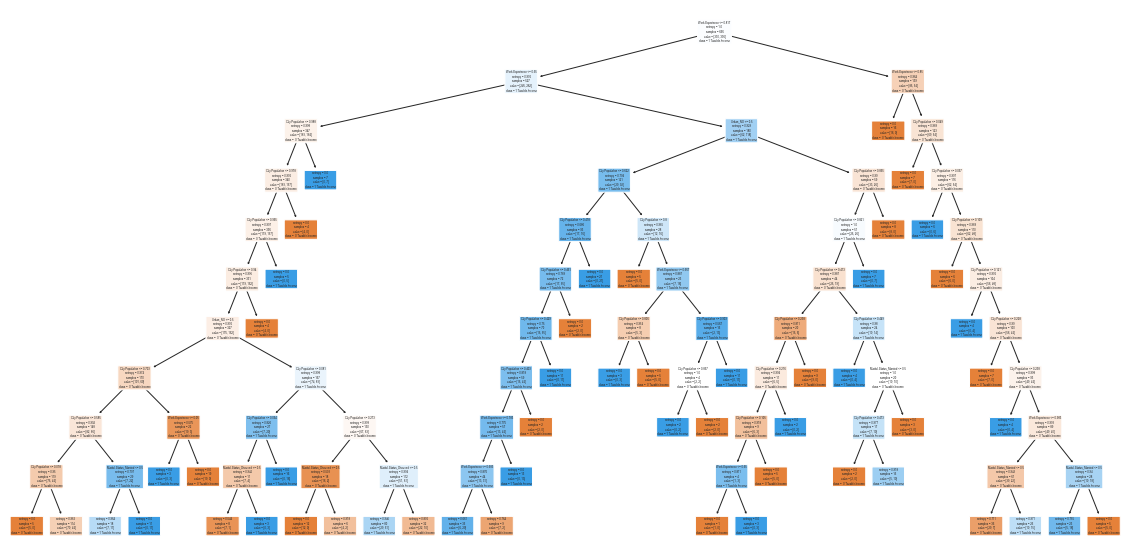

In [611]:
#PLot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_model, filled = True , rounded = True , class_names = [" 0 Taxable.Income" , "1 Taxable.Income"] , feature_names = x.columns);

In [612]:
y_train.value_counts()

1.0    336
0.0    330
Name: Taxable.Income, dtype: int64

In [613]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(pruned_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(pruned_model.score(x_test, y_test)))

Training set score: 0.8078
Test set score: 0.7168


In [618]:
#Predicting on test data
pruned_preds = pruned_model.predict(x_test) # predicting on test data set 
pd.Series(pruned_preds).value_counts() # getting the count of each category 

1.0    159
0.0    127
dtype: int64

In [619]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': pruned_preds})
df1.head()

,actual,Prediction
199,1.0,1.0
420,0.0,0.0
694,1.0,0.0
750,1.0,1.0
507,0.0,1.0


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

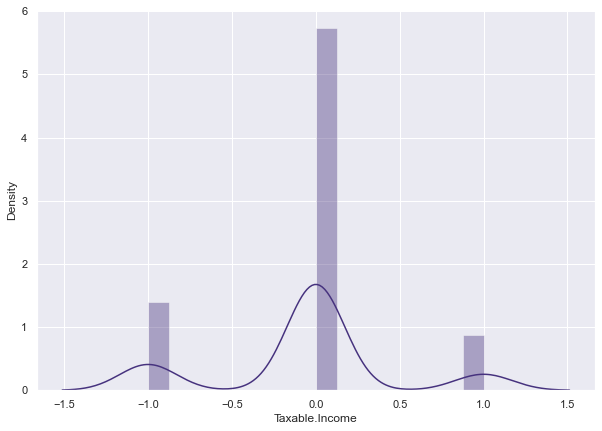

In [620]:
# checking difference between labled y and predicted y
plt.figure(figsize= (10,7))
sns.distplot(y_test-pruned_preds)

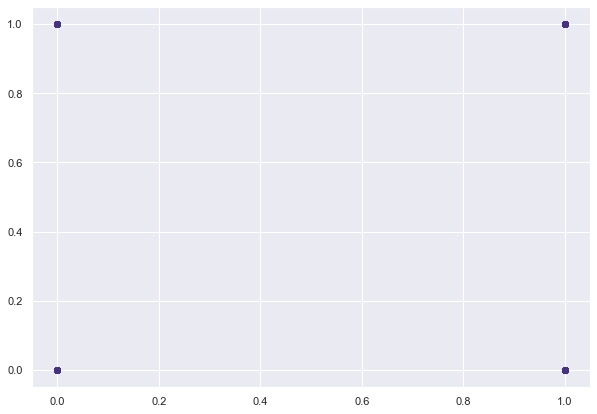

In [622]:
plt.figure(figsize= (10,7))
plt.scatter(y_test,pruned_preds)

In [623]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,pruned_preds)*100)

Accuracy_score 71.67832167832168


<Figure size 720x504 with 0 Axes>

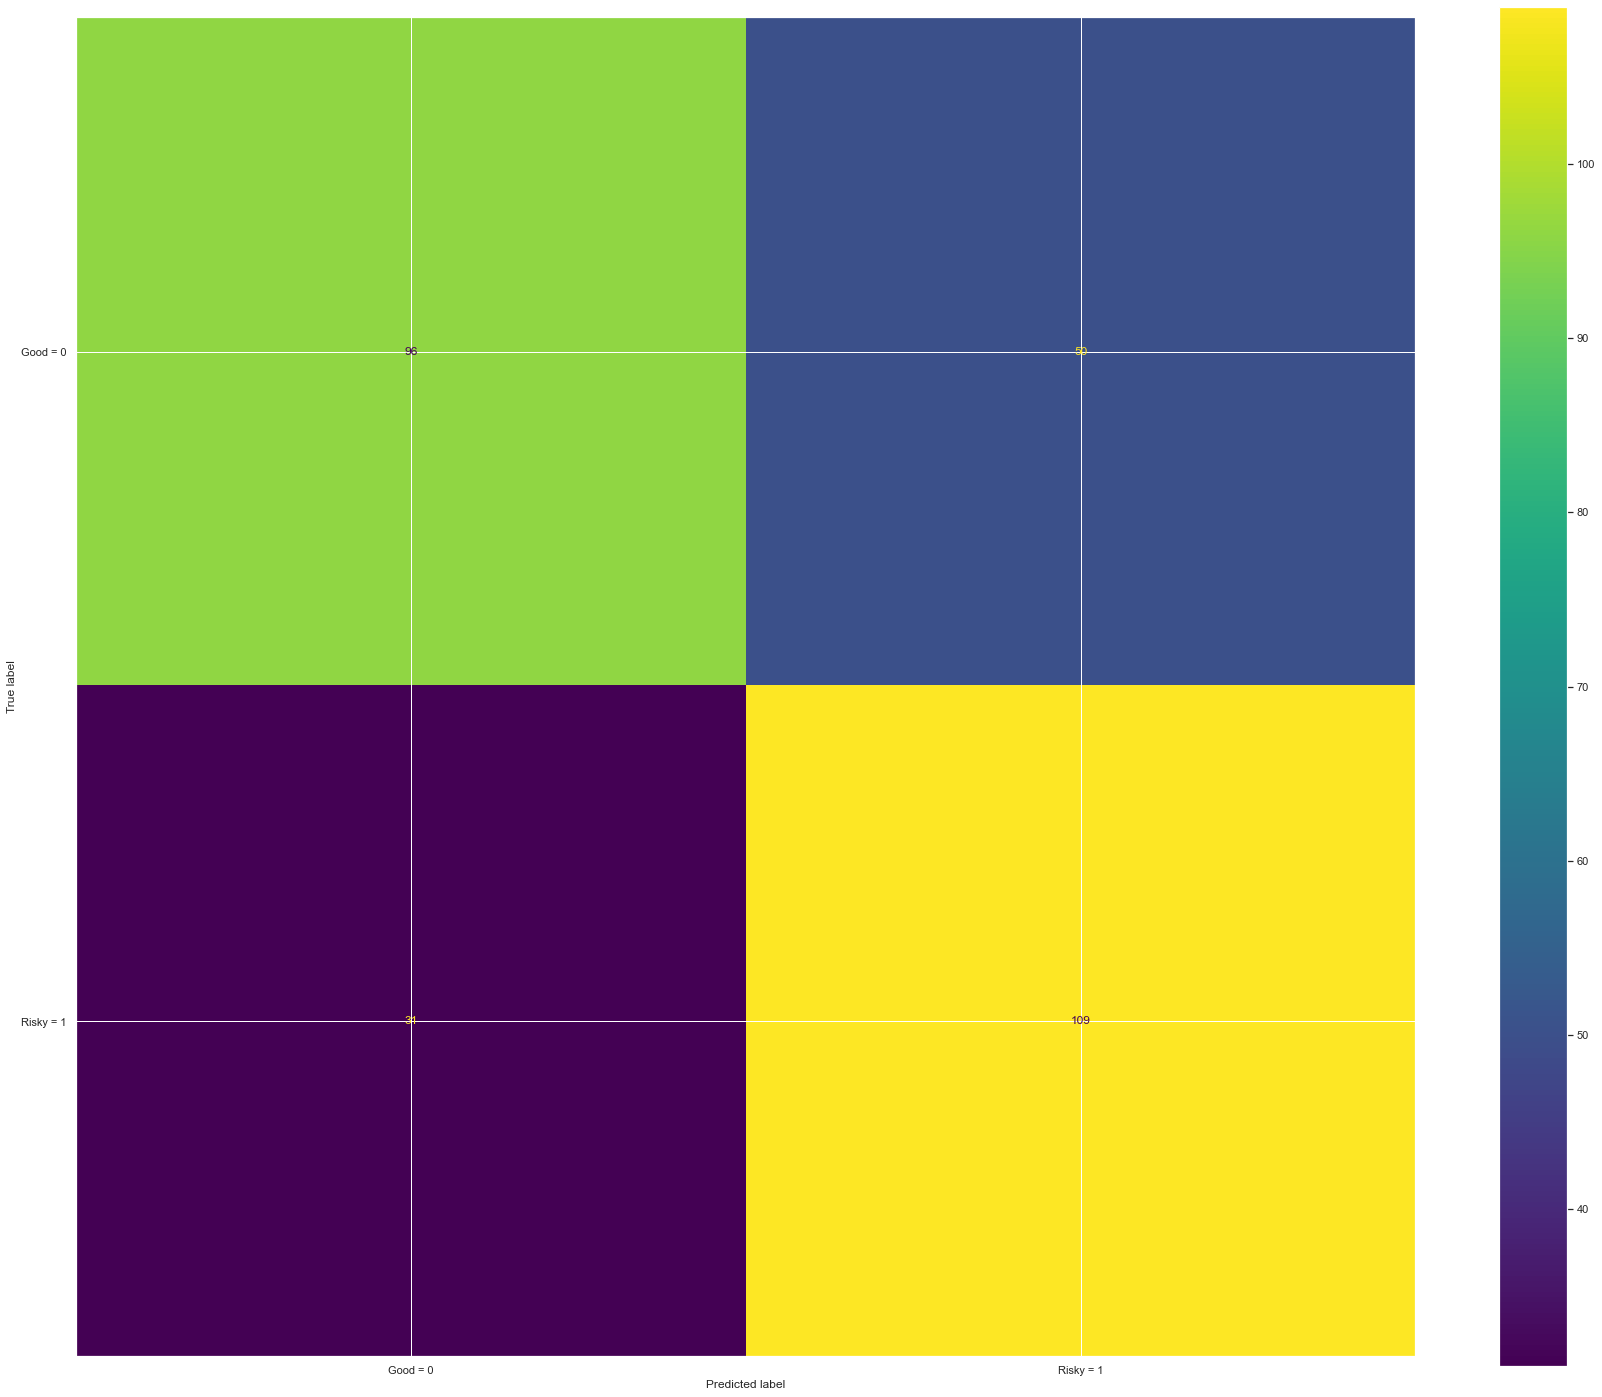

In [625]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plt.figure(figsize= (10,7))

plot_confusion_matrix(pruned_model,x_test,y_test,display_labels=["Good = 0","Risky = 1"])
plt.show()

In [626]:
print(classification_report(y_test, pruned_preds))

              precision    recall  f1-score   support

         0.0       0.76      0.66      0.70       146
         1.0       0.69      0.78      0.73       140

    accuracy                           0.72       286
   macro avg       0.72      0.72      0.72       286
weighted avg       0.72      0.72      0.72       286



In [627]:
# RMSE for train data
train_preds_grid = pruned_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = pruned_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.4383972994809528 

 test rmse = 0.5321811563901744 




In [628]:
#Probability:

y_pred_prob = pruned_model.predict_proba(x_test)
y_pred_prob[10]

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['0','1'])

y_pred_prob_df

,0,1
0,0.000000,1.000000
1,0.687500,0.312500
2,0.614035,0.385965
3,0.333333,0.666667
4,0.000000,1.000000
...,...,...
281,0.362500,0.637500
282,0.000000,1.000000
283,0.000000,1.000000
284,0.805556,0.194444


In [629]:
y_pred_prob_df.value_counts()

0         1       
0.000000  1.000000    66
0.614035  0.385965    44
0.362500  0.637500    42
1.000000  0.000000    35
0.805556  0.194444    20
0.687500  0.312500    18
0.171429  0.828571    15
0.400000  0.600000    11
0.388889  0.611111    10
0.333333  0.666667     8
0.217391  0.782609     7
0.666667  0.333333     5
0.777778  0.222222     3
0.875000  0.125000     2
dtype: int64



 ROC AUC score: 0.7180528375733854 




Text(0, 0.5, 'True Positive Rate')

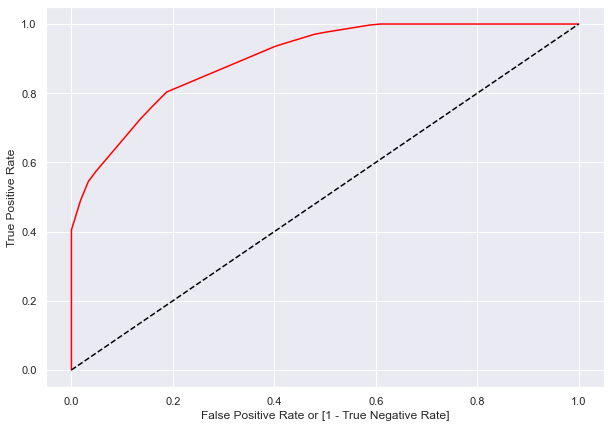

In [631]:
fpr, tpr, thresholds = roc_curve(y_train, pruned_model.predict_proba (x_train)[:,1])

# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, pruned_preds)
plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

# **RFE(Recursive Feature Elimination)**

In [632]:
pruned_model.feature_importances_

array([0.59102785, 0.22172992, 0.        , 0.        , 0.05323666,
       0.08217473, 0.        , 0.05183085, 0.        ])

In [633]:
FI = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': pruned_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
FI

,feature,importance
0,City.Population,0.591028
1,Work.Experience,0.221730
5,Marital.Status_Married,0.082175
4,Marital.Status_Divorced,0.053237
7,Urban_NO,0.051831
2,Undergrad_NO,0.000000
3,Undergrad_YES,0.000000
6,Marital.Status_Single,0.000000
8,Urban_YES,0.000000


## Checking Prediction and Accuracy with 3 different Methods:

In [634]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': pruned_preds,  'Gini_Prediction': gini_preds,  'Entro_Prediction': entro_preds})
df1.head()

,actual,Prediction,Gini_Prediction,Entro_Prediction
199,1.0,1.0,1.0,1.0
420,0.0,0.0,0.0,1.0
694,1.0,0.0,1.0,0.0
750,1.0,1.0,1.0,0.0
507,0.0,1.0,0.0,1.0


In [635]:
print("Gini_Accuracy_score", accuracy_score(y_test,gini_preds)*100)
print("Entropy_Accuracy_score", accuracy_score(y_test,entro_preds)*100)
print("Pruned_Accuracy_score", accuracy_score(y_test,pruned_preds)*100)

Gini_Accuracy_score 75.87412587412588
Entropy_Accuracy_score 72.72727272727273
Pruned_Accuracy_score 71.67832167832168


### Conclusion :

> By checking Three different method we came up with the conclusion that the performance of Gini Model is giving us a best accuracy compare to other model but by performing cost complexity prunning we find the pruned tree that minimizes the cost-complexity and it's helpfull to overcome the overfitting and underfitting problem so here we select Pruned model as our final solution.

### Advantages:

* Decision Trees are easy to explain. It results in a set of rules.
* It follows the same approach as humans generally follow while making decisions.
* Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
* The Number of hyper-parameters to be tuned is almost null.

### Disadvantages:

* There is a high probability of overfitting in Decision Tree.
* Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
* Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
* Calculations can become complex when there are many class labels.